## Pandas Load Data as Dataframe

In [2]:
import pandas as pd

aislesDF = pd.read_csv('../data/aisles.csv')
departmentDF = pd.read_csv('../data/departments.csv')
Order_Products_Prior_DF = pd.read_csv('../data/order_products_prior.csv')
Order_Products_Train_DF = pd.read_csv('../data/order_products_train.csv')
ordersDF = pd.read_csv('../data/orders.csv')
productsDF = pd.read_csv('../data/products.csv')

## Frequency of Reorders in a Week

Explore the change of order numbers from Monday to Sunday.

In [2]:
import matplotlib.pyplot as plt

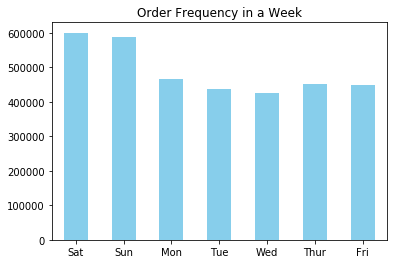

In [3]:
reorder_dow_freq = ordersDF['order_dow'].value_counts().sort_index()
reorder_dow_freq.index=['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thur', 'Fri']
fig = plt.figure()
reorder_dow_freq.plot(kind='bar', color="skyblue")
plt.xticks(rotation=0)
plt.title('Order Frequency in a Week')
plt.show()
#fig.set_dpi(200)
#fig.savefig('../figs/Order_Frequency_In_Week.png')

## Frequency of Reorders in Hour of Day

Explore how order number changes in the hour of day.

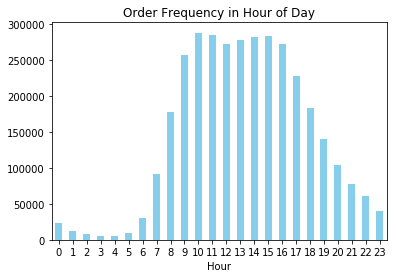

In [4]:
reorder_hour_of_day_freq = ordersDF['order_hour_of_day'].value_counts().sort_index()
#reorder_hour_of_day_freq.index = [str(i) for i in range(24)]
fig = plt.figure()
reorder_hour_of_day_freq.plot(kind='bar', color="skyblue")
plt.axvline(reorder_hour_of_day_freq.mean(), 
            linestyle='dashed', linewidth=2)
plt.xticks(rotation=0)
plt.title('Order Frequency in Hour of Day')
plt.xlabel('Hour')
plt.show()
#fig.set_dpi(200)
#fig.savefig('../figs/Order_Frequency_In_Day.png')

## Frequency of Reorder Interval

In [23]:
order_interval_count = ordersDF.groupby('days_since_prior_order')['order_id'].agg('count')

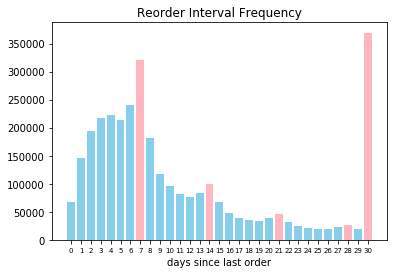

In [52]:
fig = plt.figure()

color_list = ['skyblue'] * len(order_interval_count.index)
summit  = [7,14,21,28,30] 
for i in summit:
    color_list[i] = 'lightpink'
    
plt.bar(order_interval_count.index, order_interval_count, color=color_list)
plt.xticks(np.arange(len(order_interval_count.index)), rotation=0,fontsize=7)
plt.xlabel('days since last order')
plt.title('Reorder Interval Frequency')
plt.show()
fig.set_dpi(200)
fig.savefig('../figs/reorder_interval_frequency.png')

##  Average Reorder Interval

How often do customers put a new order?

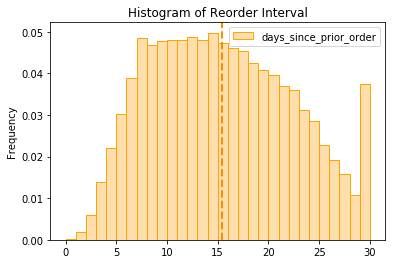

In [5]:
import numpy as np

reorder_user_interval = ordersDF[['user_id','days_since_prior_order']].groupby('user_id').aggregate(np.nanmean)
fig=plt.figure()
reorder_user_interval.plot.hist(normed=1, bins= 30, facecolor='navajowhite', edgecolor="orange")
plt.axvline(reorder_user_interval['days_since_prior_order'].mean(), 
            color='darkorange', linestyle='dashed', linewidth=2)
plt.title('Histogram of Reorder Interval')
plt.show()
#fig.set_dpi(200)
#fig.savefig('../figs/Hist_Reorder_Interval.png')

## Popular Items in Shopping Cart History

In this part, let's see what are the most popular items on customers' order lists.

First take a look at each dataset, and then merge them into one dataframe with all the following included:
* user_id
* order_id
* product_id
* product_name

In [54]:
# All orders (prior & train): order_id, product_id
All_Order_Product=pd.concat([Order_Products_Prior_DF, Order_Products_Train_DF])

In [3]:
# orders in prior/train merged with product names
Order_Product_Name_Prior = pd.merge(Order_Products_Prior_DF, 
                                    productsDF, how='left', on='product_id')
Order_Product_Name_Train = pd.merge(Order_Products_Train_DF, 
                                    productsDF, how='left', on='product_id')

In [4]:
# Prior orders with user_id, product_id, product_name
Prior_User_Order_Product = pd.merge(Order_Product_Name_Prior, 
                                    ordersDF, how='left', on='order_id')

In [5]:
# Now we have all we need: order_id, product_id, user_id, product_name
Prior_User_Order_Product.head() 

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,202279,prior,3,5,9,8.0
1,2,28985,2,1,Michigan Organic Kale,83,4,202279,prior,3,5,9,8.0
2,2,9327,3,0,Garlic Powder,104,13,202279,prior,3,5,9,8.0
3,2,45918,4,1,Coconut Butter,19,13,202279,prior,3,5,9,8.0
4,2,30035,5,0,Natural Sweetener,17,13,202279,prior,3,5,9,8.0


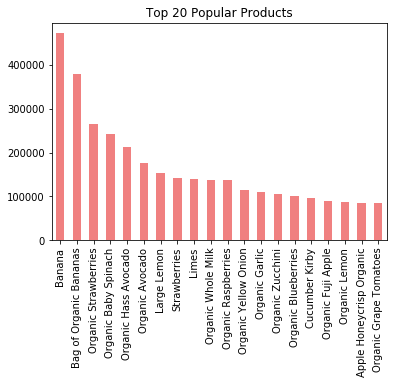

In [59]:
# top 20 most popular products
Products_Count = Prior_User_Order_Product['product_name'].value_counts()
fig = plt.figure()
Products_Count[0:20].plot(kind="bar", color='lightcoral')
plt.xticks(rotation=90)
plt.title('Top 20 Popular Products')
plt.show()
#fig.set_dpi(200)
#fig.savefig('../figs/Top_20_Popular_Products.png')

In [60]:
products_tuple_list = [tuple(x) for x in Products_Count.reset_index().values]

In [61]:
dic = {}
for pair in products_tuple_list:
    key = pair[0]
#     print(type(key))
    value = pair[1]
#     print(type(value))
    if key in dic:
        reservedValue = dic[key]
        reservedValue += value 
    else:
        dic[key] = value

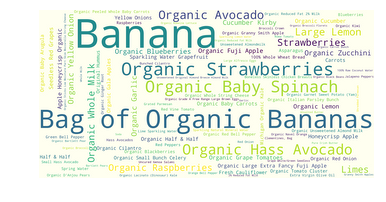

In [62]:
from os import path
from wordcloud import WordCloud

fig = plt.figure()
wordcloudData = WordCloud(width=4096,height=2048,
                          relative_scaling=1,
                          max_words = 100,
                          background_color='ivory').generate_from_frequencies(frequencies = dic)
plt.imshow(wordcloudData, interpolation='lanczos')
plt.axis("off")
plt.show()
fig.set_dpi(200)
fig.savefig('../figs/wordcloud.png',bbox_inches='tight')

## Treeplot: Products Sales in Each Department

In [47]:
product_count = Prior_User_Order_Product.groupby(['department_id','aisle_id'])['product_id'].agg('count')

In [55]:
product_count_DF = pd.DataFrame(product_count)
product_count_DF.reset_index(inplace=True)
product_count_DF.rename(columns = {'product_id':'product_count'}, inplace=True)
product_count_DF = product_count_DF.merge(departmentDF, how='left', on='department_id').\
                                    merge(aislesDF,how='left', on='aisle_id')

In [60]:
product_count_DF.head()

,department_id,aisle_id,product_count,department,aisle
0,1,34,71742,frozen,frozen meat seafood
1,1,37,498425,frozen,ice cream ice
2,1,38,390299,frozen,frozen meals
3,1,42,99369,frozen,frozen vegan vegetarian
4,1,52,232763,frozen,frozen breakfast


In [67]:
product_info = Prior_User_Order_Product.merge(departmentDF,how='left', on='department_id') \
                                       .merge(aislesDF,how='left', on='aisle_id')

In [68]:
product_info.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,department,aisle
0,2,33120,1,1,Organic Egg Whites,86,16,202279,prior,3,5,9,8.0,dairy eggs,eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,202279,prior,3,5,9,8.0,produce,fresh vegetables
2,2,9327,3,0,Garlic Powder,104,13,202279,prior,3,5,9,8.0,pantry,spices seasonings
3,2,45918,4,1,Coconut Butter,19,13,202279,prior,3,5,9,8.0,pantry,oils vinegars
4,2,30035,5,0,Natural Sweetener,17,13,202279,prior,3,5,9,8.0,pantry,baking ingredients


In [69]:
product_info.groupby('order_hour_of_day','product_id')['product_id'].agg('count')

order_hour_of_day
0      218948
1      115786
2       69434
3       51321
4       53283
5       88062
6      290795
7      891937
8     1719973
9     2456713
10    2764426
11    2738582
12    2620847
13    2663292
14    2691548
15    2664533
16    2537458
17    2089465
18    1637923
19    1259401
20     977038
21     796370
22     634734
23     402620
Name: department, dtype: int64